In [57]:
import os
import re
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import rmgpy.data.thermo

In [34]:
bee_files = sorted(glob.glob('./thermo/beef-ensembles/*_bee.txt'))

In [35]:

def get_name_from_path(path):
    search_pattern = r'beef-ensembles/(.+)_bee.txt'
    m1 = re.search(search_pattern, path)
    if m1 is not None:
        return m1[1]


In [36]:
# load their thermo library
thermo_lib = '/home/moon/uncertainty_estimator/thermo_kinetics_scripts/beef-uq/thermo/lib'
thermo_database = rmgpy.data.thermo.ThermoDatabase()
thermo_database.load_libraries(thermo_lib)

items = [thermo_database.libraries['surfaceThermoPt111'].entries[e].item for e in thermo_database.libraries['surfaceThermoPt111'].entries]
labels = [thermo_database.libraries['surfaceThermoPt111'].entries[e].label for e in thermo_database.libraries['surfaceThermoPt111'].entries]

In [40]:
# get the adjacency list for each species
molecules = []
species_names = []
for i in range(len(bee_files)):
    sp_name = get_name_from_path(bee_files[i])
    species_names.append(sp_name)
    assert sp_name is not None
    try:
        entry_index = labels.index(sp_name)
        molecules.append(items[entry_index])
#         display(items[entry_index])
    except ValueError:
        print(f'No {i} {sp_name}')


'XNHXCO'

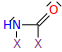

In [44]:
i = 150
display(species_names[i], molecules[i])

In [48]:
M = len(bee_files)
N = 2000
X = np.zeros((M, 2000))
Y = np.zeros((M, 2000))

In [52]:
for i in range(M):
    df = pd.read_csv(bee_files[i], sep='\t')
    X[i, :] = df['Hf'].values
    Y[i, :] = df[df.columns[1]].values

In [53]:
covX = np.cov(X)

In [ ]:
# 30 kJ per mol is about average

In [74]:
np.save('surfaceThermoPt111_covarance.npy', covX)

In [55]:
covX.shape

(182, 182)

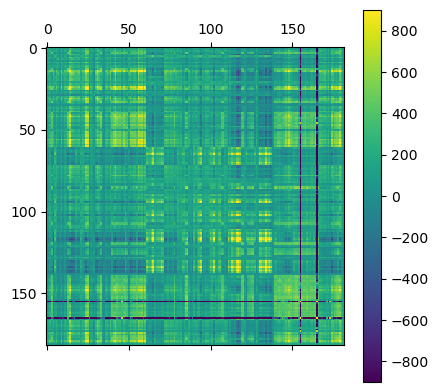

In [71]:
plt.matshow(covX)
plt.clim([-900, 900])
plt.colorbar()

In [73]:
np.float_power(np.diagonal(covX), 0.5)  # yes, these values make sense

array([ 15.66779115,  12.11932168,  17.14170474,  20.91178795,
        19.86842263,  17.18610605,  16.66797151,  17.57476984,
         6.45209368,  19.55149624,  11.74828979,  15.0415957 ,
        16.16153133,  22.73756068,  34.14813382,  26.75999286,
        22.76245518,  17.78987536,  19.16610524,  18.84437146,
        19.43912431,  15.03783379,  17.66481603,  15.87752737,
        34.1698851 ,  30.95342591,   7.59506897,  15.69103864,
        13.41823585,  12.42589617,  20.18789191,  29.75135408,
        22.54949694,  24.20987707,  11.55265174,   4.7237449 ,
        14.85594814,  19.78972118,  13.21064328,  21.99264183,
        21.61448674,  24.80820847,  31.84660793,  24.15844159,
        21.67664708,  22.02443231,  21.42346029,  23.85680733,
        21.97808734,  21.67923435,  15.51159198,  24.04287941,
        22.49462433,  22.50283371,  22.69939064,  20.64690105,
        34.43963522,  26.87453801,  28.5536614 ,  19.97354793,
        27.12366022,  19.49823649,  15.92312432,  16.13

In [18]:
for i in range(len(df)):
    print(df['Hf'].values[i] - df['deltaHf ref=-199.31038140576345'].values[i])

-199.31038140576345
-199.31038140576345
-199.31038140576342
-199.31038140576345
-199.31038140576348
-199.31038140576345
-199.31038140576345
-199.31038140576342
-199.31038140576345
-199.31038140576345
-199.31038140576342
-199.31038140576345
-199.31038140576342
-199.31038140576345
-199.31038140576345
-199.31038140576348
-199.31038140576345
-199.31038140576345
-199.31038140576345
-199.31038140576345
-199.31038140576345
-199.31038140576345
-199.31038140576345
-199.31038140576345
-199.31038140576345
-199.31038140576345
-199.31038140576345
-199.31038140576345
-199.31038140576345
-199.31038140576345
-199.31038140576342
-199.31038140576345
-199.31038140576345
-199.31038140576345
-199.31038140576345
-199.31038140576345
-199.31038140576348
-199.31038140576345
-199.31038140576345
-199.31038140576348
-199.31038140576345
-199.31038140576345
-199.31038140576345
-199.31038140576345
-199.31038140576342
-199.31038140576348
-199.31038140576345
-199.31038140576345
-199.31038140576348
-199.31038140576342
